# Part II - Ford GoBike System Data Explanation:
## by Mamdouh Ali


## Investigation Overview


In this investigation, I wanted to look at the characteristics of trip data that could be used to predict their duration. The main focus was on the five: age, duration, user type, and gender.
 


## Dataset Overview

The data consisted of duration_sec and attributes of approximately 174,952. The attributes included the five, as well as additional measurements such as start station name, start station latitude, and start station longitude.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df = df.dropna()

In [4]:
# Changing the format to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
# Dropping unnecessary columns
df = df.drop(columns=['bike_id', 'start_station_id', 'start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_latitude', 'end_station_longitude'])

In [6]:
# Adding user age column 
df['trip_year'] = df.start_time.dt.year.astype(int)
df['user_age'] = df.trip_year.astype(int) - df.member_birth_year
df['user_age'] = df['user_age'].astype(int)
df = df.drop(columns=['trip_year', 'member_birth_year'])

In [7]:
# Duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

In [8]:
# Start time weekday
df['start_time_weekday'] = df['start_time'].dt.day_name().astype(str)

In [9]:
# Start and end time hour
df['start_time_hour'] = df['start_time'].dt.hour.astype(str)
df['end_time_hour'] = df['end_time'].dt.hour.astype(str)

In [10]:
base_color = sb.color_palette()[0]

## Distribution of Trip Durations

Trip Durations in the dataset take on a very large range of values. Number of Trips values first increases starting from around 8000 values to 12500 values at peak around 10 minutes but then starts to fall below at 2000 values.

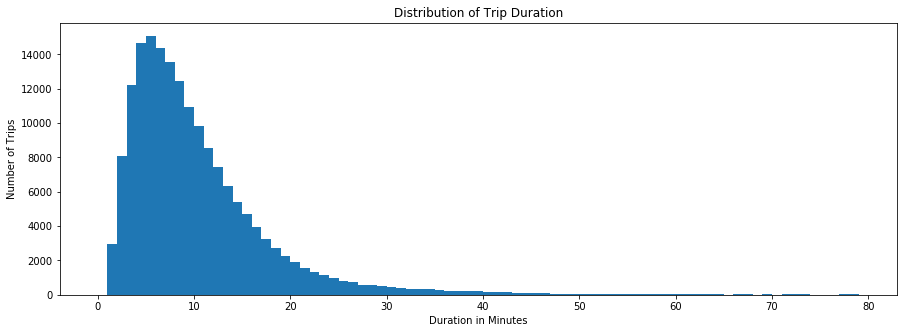

In [11]:
# Duration of the bike rides in MINUTES

plt.figure(figsize=[15, 5])
bins = np.arange(0, 80, 1)
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Trips');

## Distribution of User Age

In the case of age, you can see that the distribution is more concentrated between 20 to 40 years old.

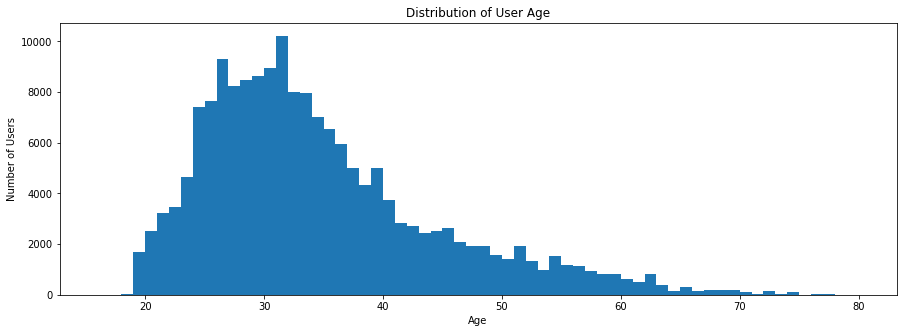

In [12]:
# Age distribution 

plt.figure(figsize=[15, 5])
bins = np.arange(16, 80+1, 1)
plt.hist(data = df.dropna(), x = 'user_age', bins = bins)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

## User Type vs. Gender
Males and subscribers are with more trips than females and customers.

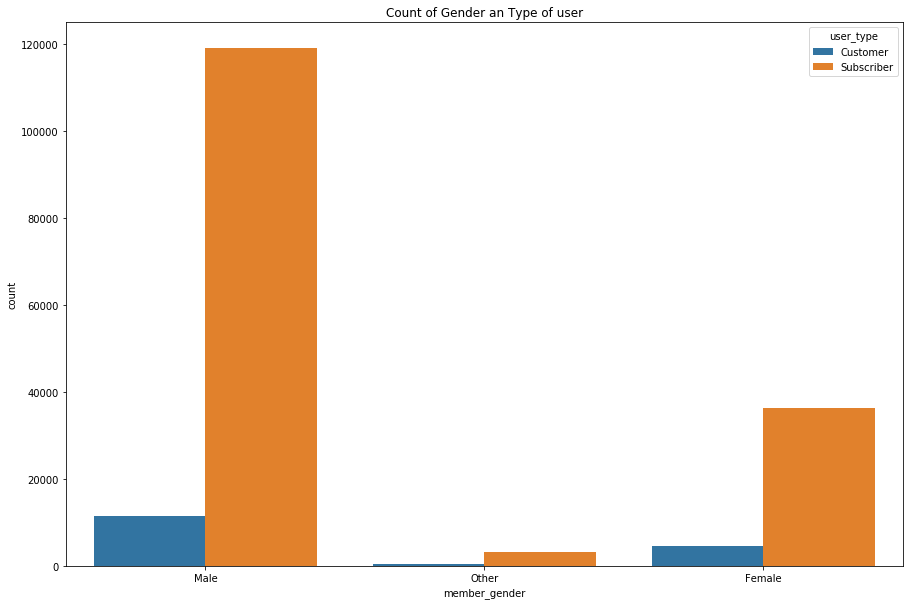

In [13]:
# gender & type

plt.figure(figsize=[15, 10])
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');
plt.title('Count of Gender an Type of user');

## Trip Duration vs. Age

By looking at the chart below, we can see that most frequent users aged between 20 and 45. As remark, duration is registered by younger members.



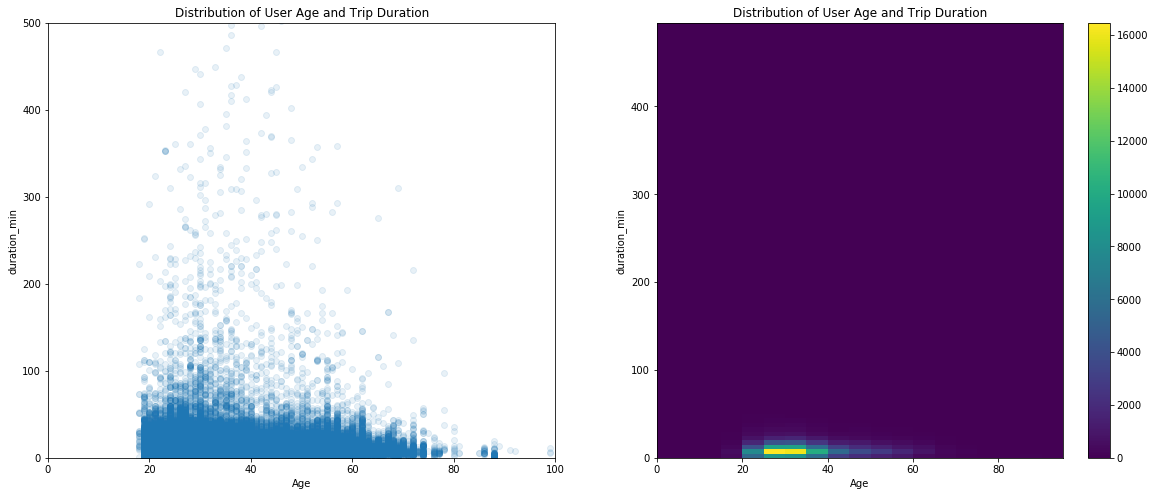

In [14]:
# Age & duration

plt.figure(figsize=[20, 8])
# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'user_age', y = 'duration_min', scatter_kws={'alpha':1/10}, fit_reg = False)
plt.axis([0, 100, 0, 500])
plt.title('Distribution of User Age and Trip Duration')
plt.xlabel('Age')
plt.ylabel('duration_min');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
bins_x = np.arange(0, 100, 5)
bins_y = np.arange(0, 500, 5)
plt.hist2d(data = df, x = 'user_age', y = 'duration_min', bins = [bins_x, bins_y])
plt.colorbar()
plt.title('Distribution of User Age and Trip Duration')
plt.xlabel('Age')
plt.ylabel('duration_min');

In [1]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 425519 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages/nbcon